<center> <H1> Team Flask Capstone Project - Winter '23 </H1> </center>

### Context
Africa, the world's second-largest continent, a continent with a wide array of vibrant cultures each with its own deep history, continent number 2 of largest population, and the continent is home to wonderful wild-life you can spot when you go on safari!
Let's focus on Africa in this dataset.

Malaria is a common disease in Africa. The disease is transmitted to humans through infected mosquito bites. Although you can take preventive measures against malaria, it can be life-threatening. This dataset includes the malaria cases in African countries, the incidence at risk, and data on preventive treatments against malaria.

### Content
This dataset includes data on all African countries from 2007 till 2017. Each country has a unique ISO-3 country code, and the dataset includes the latitude and longitude point of each country as well. The dataset includes the cases of malaria that have been reported in each country and each year, as well as data on preventive measures that have been taken to prevent malaria.

### Acknowledgements
The data on the incidence of malaria, malaria cases reported, and preventive treatments against malaria have been retrieved from the world bank open data source.

### Inspiration
Each country has a unique ISO-3 country code. You can use the ISO-3 code to create choropleth maps and in the geospatial analysis. In addition, the dataset includes latitude and longitude points for each country.

Drinking water safety and sanitation include a risk factor for malaria. Can improved drinking water facilities and preventive measures decrease the risk of malaria infection?

# Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
# mounting google drive to google colab
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# load dataset
dataset = pd.read_csv("/content/drive/MyDrive/DatasetAfricaMalaria.csv")

print("Data imported successfully")

Data imported successfully


In [5]:
# create a copy of the original dataset
df = dataset.copy()

# Data Inspection

In [6]:
# inspect dataframe by printing out the first 5 rows
df.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [7]:
#display all columns for better visibility
pd.set_option('display.max_columns', None)

In [8]:
#explore top 5 and bottom 5 data (full columns)
df

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.24,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,83.96,NaN,NaN,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,NaN,NaN,NaN,NaN,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,NaN,78.12,NaN,88.29,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,15.70,NaN,NaN,NaN,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,46.25,NaN,NaN,NaN,57.02,2.01,42.98,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


In [9]:
#statistical description

df.describe()

,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,594.000000,550.000000,5.500000e+02,132.000000,122.000000,106.000000,99.000000,88.000000,176.000000,132.000000,110.000000,132.000000,588.000000,588.000000,588.000000,588.000000,588.000000,566.000000,566.000000,588.000000,566.000000,566.000000,594.000000,594.000000
mean,2012.000000,190.087491,1.068330e+06,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,14.361727,32.174621,56.836650,1.389371,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,3.164943,163.054527,2.192802e+06,20.157059,18.903198,12.389166,26.678321,10.078371,24.157416,18.631510,7.088038,21.693458,18.086328,1.199693,18.086118,1.456244,17.283361,18.927868,9.307285,26.304934,24.046725,21.802128,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,1.000000,0.500000,0.000000,5.770000,0.930000,11.200000,6.370000,2.300000,7.950000,11.020000,-3.450000,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,2009.000000,30.857500,2.211750e+03,26.675000,17.275000,5.763285,8.975000,4.185000,34.125000,16.532500,7.200000,18.262500,43.057500,0.410000,28.795000,2.512500,52.375000,37.075000,78.080000,18.197500,8.842500,30.775000,-6.369028,0.824782
50%,2012.000000,174.775000,1.130260e+05,42.900000,29.300000,11.500000,28.390000,10.675000,51.365000,25.410000,15.950000,22.755000,58.445000,1.675000,41.560000,3.730000,64.470000,50.435000,85.420000,32.555000,18.815000,44.695000,6.744051,18.611308
75%,2015.000000,347.637500,1.154808e+06,56.325000,42.625000,21.850000,43.890000,16.887500,70.747500,35.725000,20.315000,39.225000,71.205000,2.130000,56.945000,4.450000,79.165000,62.245000,90.082500,54.810000,38.082500,58.845000,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,25.540000,88.290000,90.140000,7.090000,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


**OBSERVATIONS:** 
-Incidence report with zero malaria case recorded (see for example Year 2007 for Benin, Cameroon, Central African Republic, Cote d'Ivoire, Egypt, Gambia, Kenya, Libya, Malawi, Mali, Mauritania, Morocco, Nigeria, Sierra Leone, South Sudan, Zambia).

-Header name columns are too long. 

-Indicator of malaria will use 'Malaria cases' and 'Incidence rate'. 

-Many NaN values.

In [11]:
# return a total count for each year in the dataset
df.Year.value_counts()

2007    54
2008    54
2009    54
2010    54
2011    54
2012    54
2013    54
2014    54
2015    54
2016    54
2017    54
Name: Year, dtype: int64

In [12]:
# return a total count for each country in the dataset
df['Country Name'].value_counts()

Algeria                     11
Sao Tome and Principe       11
Madagascar                  11
Malawi                      11
Mali                        11
Mauritania                  11
Mauritius                   11
Morocco                     11
Mozambique                  11
Namibia                     11
Niger                       11
Nigeria                     11
Rwanda                      11
Senegal                     11
Angola                      11
Seychelles                  11
Sierra Leone                11
Somalia                     11
South Africa                11
South Sudan                 11
Sudan                       11
Tanzania                    11
Togo                        11
Tunisia                     11
Uganda                      11
Zambia                      11
Libya                       11
Liberia                     11
Lesotho                     11
Kenya                       11
Benin                       11
Botswana                    11
Burkina 

In [13]:
# check the shape of the dataset i.e. the number of rows and columns
df.shape

(594, 27)

In [14]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

In [15]:
# Check the datatype counts of the dataset
df.dtypes.value_counts()

float64    23
object      3
int64       1
dtype: int64

In [16]:
# number of unique values in each features
df.nunique()

Country Name                                                                                54
Year                                                                                        11
Country Code                                                                                54
Incidence of malaria (per 1,000 population at risk)                                        499
Malaria cases reported                                                                     467
Use of insecticide-treated bed nets (% of under-5 population)                              117
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    110
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)       95
People using safely managed drinking water services (% of population)                       99
People using safely managed drinking water services, rural (% of rural population)          87
People using safely managed drinking water service

In [17]:
#check for duplicated record

df.duplicated().any()

False

In [18]:
# check for missingness in the features
df.isnull().sum()

Country Name                                                                                 0
Year                                                                                         0
Country Code                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water service

In [19]:
#check for % of null record

df.isnull().sum()/len(df)*100

Country Name                                                                                0.000000
Year                                                                                        0.000000
Country Code                                                                                0.000000
Incidence of malaria (per 1,000 population at risk)                                         7.407407
Malaria cases reported                                                                      7.407407
Use of insecticide-treated bed nets (% of under-5 population)                              77.777778
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    79.461279
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      82.154882
People using safely managed drinking water services (% of population)                      83.333333
People using safely managed drinking water services, rural (% of rural population)         

**Observation**

- More than 70% missing records for malaria preventive measures.

# Data transformation

In [20]:
# print column names
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [21]:
# rename columns using dictionary 

mapping = {df.columns[3]: 'Incidence rate',
           df.columns[4]: 'Malaria cases',
           df.columns[5]: '% Use ITNs',
           df.columns[6]: '% Child fever',
           df.columns[7]: '% IPT',
           df.columns[8]: '% Safe DW all',
           df.columns[9]: '% Safe DW rural',
           df.columns[10]: '% Safe DW urban',
           df.columns[11]: '% Safe sanitation all',
           df.columns[12]: '% Safe sanitation rural',
           df.columns[13]: '% Safe sanitation urban',
           df.columns[14]: '% Rural pop',
           df.columns[15]: '% Rural annual growth',
           df.columns[16]: '% Urban pop',
           df.columns[17]: '% Urban annual growth',
           df.columns[18]: '% Basic DW all',
           df.columns[19]: '% Basic DW rural',
           df.columns[20]: '% Basic DW urban',
           df.columns[21]: '% Basic sanitation all',
           df.columns[22]: '% Basic sanitation rural',
           df.columns[23]: '% Basic sanitation urban'}

df = df.rename(columns=mapping)

In [22]:
# print Data frame after rename columns
df.head()

,Country Name,Year,Country Code,Incidence rate,Malaria cases,% Use ITNs,% Child fever,% IPT,% Safe DW all,% Safe DW rural,% Safe DW urban,% Safe sanitation all,% Safe sanitation rural,% Safe sanitation urban,% Rural pop,% Rural annual growth,% Urban pop,% Urban annual growth,% Basic DW all,% Basic DW rural,% Basic DW urban,% Basic sanitation all,% Basic sanitation rural,% Basic sanitation urban,latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.24,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,83.96,NaN,NaN,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


<Axes: >

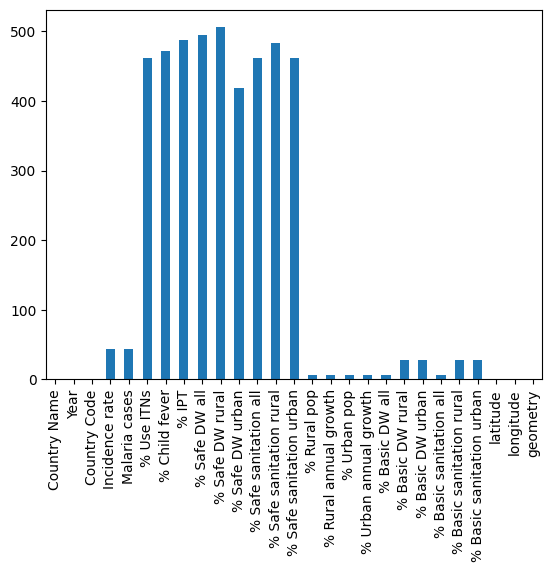

In [23]:
# plot the missingness in the features
df.isnull().sum().plot(kind='bar')

In [24]:
# fill missing values with 0
df = df.fillna(0)

In [25]:
# confirm there isn't null record after fill
df.isnull().sum()

Country Name                0
Year                        0
Country Code                0
Incidence rate              0
Malaria cases               0
% Use ITNs                  0
% Child fever               0
% IPT                       0
% Safe DW all               0
% Safe DW rural             0
% Safe DW urban             0
% Safe sanitation all       0
% Safe sanitation rural     0
% Safe sanitation urban     0
% Rural pop                 0
% Rural annual growth       0
% Urban pop                 0
% Urban annual growth       0
% Basic DW all              0
% Basic DW rural            0
% Basic DW urban            0
% Basic sanitation all      0
% Basic sanitation rural    0
% Basic sanitation urban    0
latitude                    0
longitude                   0
geometry                    0
dtype: int64

In [26]:
# convert 'malaria cases reported' datatype to integer
df['Malaria cases'] = df['Malaria cases'].astype(int)

In [27]:
# convert year to date time 
from datetime import datetime

df['Year'] = pd.to_datetime(df.Year,format='%Y')

In [28]:
#unique countries
df['Country Name'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Djibouti', 'Egypt, Arab Rep.',
       'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
       'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

In [30]:
# plot summary statistics after null handling
df.describe()

,Incidence rate,Malaria cases,% Use ITNs,% Child fever,% IPT,% Safe DW all,% Safe DW rural,% Safe DW urban,% Safe sanitation all,% Safe sanitation rural,% Safe sanitation urban,% Rural pop,% Rural annual growth,% Urban pop,% Urban annual growth,% Basic DW all,% Basic DW rural,% Basic DW urban,% Basic sanitation all,% Basic sanitation rural,% Basic sanitation urban,latitude,longitude
count,594.000000,5.940000e+02,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,176.006936,9.891945e+05,9.451178,6.203030,2.679259,5.579832,1.847492,15.273939,6.393098,2.659579,7.149916,56.262542,1.375337,42.728114,3.487475,65.328300,49.024343,80.296246,39.071111,26.753704,45.821582,2.828796,17.342546
std,164.610210,2.128383e+06,20.072904,14.900588,7.764126,16.539561,5.878874,26.967129,14.831641,6.356886,16.828195,18.872221,1.201680,18.505645,1.491142,18.420489,21.457954,20.050689,26.467937,24.215905,23.599405,15.678226,20.041257
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.450000,0.000000,-4.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.559482,-24.013197
25%,6.950000,3.080000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.097500,0.370000,28.372500,2.452500,51.972500,34.907500,76.302500,18.032500,7.532500,28.015000,-6.369028,0.824782
50%,127.355000,5.258350e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.405000,1.660000,41.355000,3.725000,64.195000,49.385000,84.905000,32.365000,18.170000,43.250000,6.744051,18.611308
75%,337.367500,1.041084e+06,0.000000,0.000000,0.000000,0.000000,0.000000,24.122500,0.000000,0.000000,0.000000,70.372500,2.127500,56.365000,4.435000,78.942500,61.405000,89.865000,54.515000,36.640000,57.627500,12.862807,31.465866
max,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,25.540000,88.290000,90.140000,7.090000,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


# Exploratory Data Analysis

REGIONAL ANALYSIS OF MALARIA CASES AND INCIDENCE RATE

In [31]:
# categorize Incidence rate & Malaria cases per country
africa_aggregate = df.groupby('Country Name')[['Incidence rate', 'Malaria cases']].sum()

# create lists to split Africa into five blocks
east = ['Uganda', 'South Sudan', 'Congo, Dem. Rep.', 'Rwanda', 'Tanzania', 'Kenya', 'Burundi', 'Somalia', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Seychelles', 'Zambia']
south = ['Botswana', 'Lesotho', 'Namibia', 'South Africa', 'Eswatini']
north = ['Algeria', 'Egypt, Arab Rep.', 'Libya', 'Morocco', 'Tunisia', 'Western Sahara']
west = ["Cote d'Ivoire", 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo', 'Benin', 'Burkina Faso', 'Cabo Verde', 'Gambia, The']
central = ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.','Equatorial Guinea', 'Gabon', 'Sao Tome and Principe']


In [32]:
# filter five separate dataframes from the aggregated dataframe
eastern_region = africa_aggregate.query('`Country Name`== @east')
western_region = africa_aggregate.query('`Country Name`== @west')
southern_region = africa_aggregate.query('`Country Name`== @south')
northern_region = africa_aggregate.query('`Country Name`== @north')
central_region = africa_aggregate.query('`Country Name` == @central') 

In [33]:
# create empty lists to store total incidence rate and malaria cases for each region
total_incidence = []
total_malaria_cases = []

# iterate through each region dataframe
for region_df in [eastern_region, western_region, southern_region, northern_region, central_region]:
    
    # sum the incidence rate and malaria cases columns for the region dataframe
    region_incidence = region_df['Incidence rate'].sum()
    region_malaria_cases = region_df['Malaria cases'].sum()
    
    # append the total incidence rate and malaria cases for the region to the respective lists
    total_incidence.append(region_incidence)
    total_malaria_cases.append(region_malaria_cases)

In [35]:
region = ['East', 'West', 'South', 'North', 'Central']
# create a dictionary with the three lists
data = {'area':region, 'regional_incidence':total_incidence, 'regional_malaria_cases':total_malaria_cases}

# create a pandas dataframe from the dictionary
pie_data = pd.DataFrame(data)

pie_data

,area,regional_incidence,regional_malaria_cases
0,East,29796.41,325054622
1,West,51959.61,212934849
2,South,174.67,227284
3,North,0.04,94
4,Central,25388.67,116310244


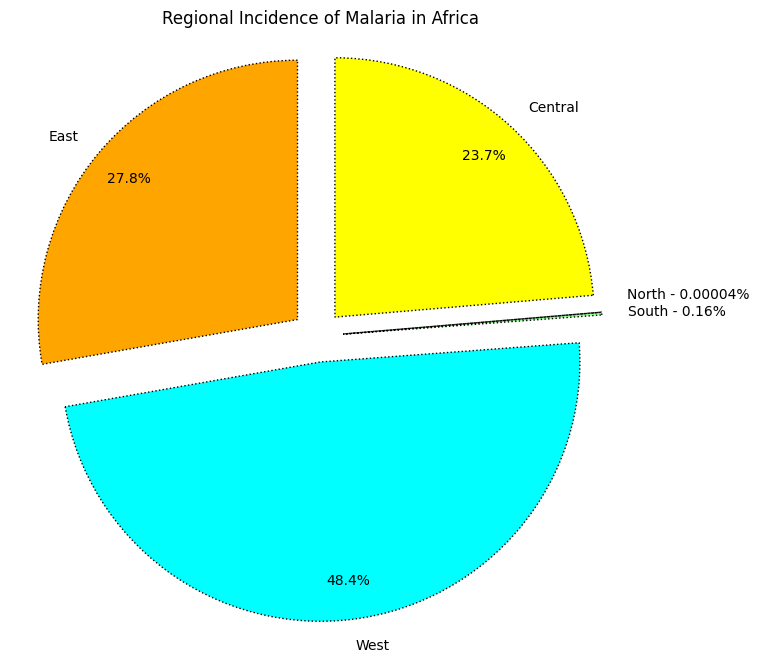

In [36]:
# set colors for the pie chart
colors = ['#FFA500','#00FFFF','#99ff99','#ffcc99', '#FFFF00']

# plot the pie chart for regional incidence
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(pie_data['regional_incidence'], colors=colors, labels=['East', 'West', 'South - 0.16%', 'North - 0.00004%\n\n', 'Central'],
        autopct=lambda pct: '' if pct < 5 else f'{pct:.1f}%', startangle=90, pctdistance=0.85, 
        explode=[0.1, 0.1, 0.1, 0.1, 0.1], wedgeprops={'linewidth': 1, 'edgecolor': 'black', 'linestyle': 'dotted'}, shadow=False)

plt.title('Regional Incidence of Malaria in Africa')
plt.axis('equal')

# show the plot
plt.show()


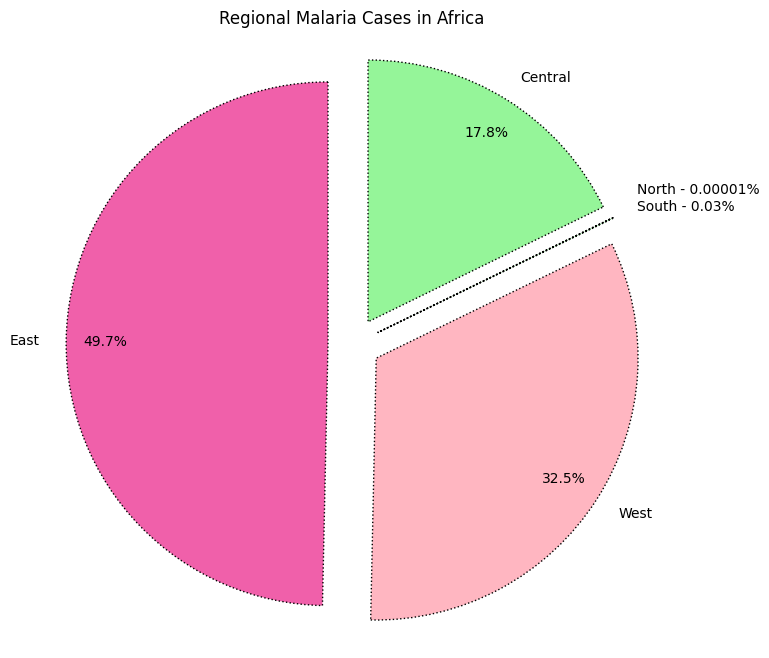

In [37]:
# set colors for the pie chart
colors = ['#F060AA','#FFB6C1','#99ff99','#ffcc99', '#95F599']

# plot the pie chart for regional incidence
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(pie_data['regional_malaria_cases'], colors=colors, labels=['East', 'West', 'South - 0.03%', 'North - 0.00001%\n\n', 'Central'],
        autopct=lambda pct: '' if pct < 5 else f'{pct:.1f}%', startangle=90, pctdistance=0.85, 
        explode=[0.1, 0.1, 0.1, 0.1, 0.1], wedgeprops={'linewidth': 1, 'edgecolor': 'black', 'linestyle': 'dotted'}, shadow=False)

plt.title('Regional Malaria Cases in Africa')
plt.axis('equal')

# show the plot
plt.show()

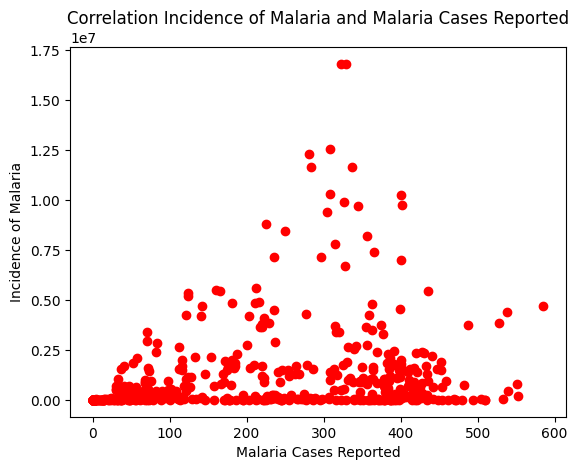

In [38]:
# scatterplot of Incidence of Malaria and Malaria Cases Reported
plt.scatter(x=df['Incidence rate'], y=df['Malaria cases'],color='red')
plt.title("Correlation Incidence of Malaria and Malaria Cases Reported")
plt.xlabel("Malaria Cases Reported")
plt.ylabel("Incidence of Malaria")
plt.show()

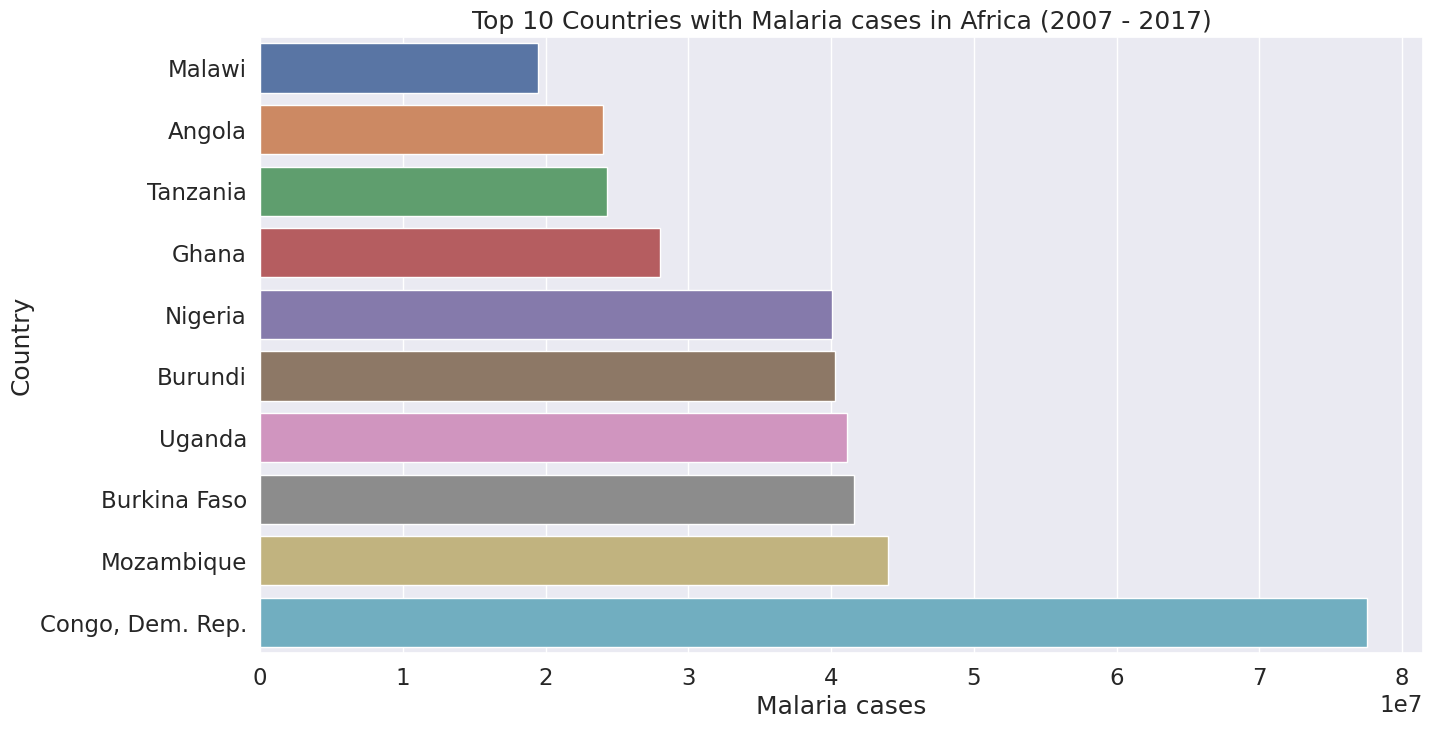

In [47]:
#TOP COUNTRIES WITH MALARIA CASES
malaria_case_per_country  =  df[['Country Name','Malaria cases']].groupby('Country Name').sum().sort_values(by='Malaria cases')
malaria_case_per_country = malaria_case_per_country.tail(10)
a = malaria_case_per_country.reset_index()
# malaria_case_per_country = malaria_case_per_country.to_frame()

#
plt.figure(figsize=(15,8))
sns.barplot(x="Malaria cases", y="Country Name", data = a)

plt.title("Top 10 Countries with Malaria cases in Africa (2007 - 2017)")
plt.xlabel("Malaria cases")
plt.ylabel("Country")
plt.show()

YEARLY DYNAMICS OF MALARIA CASES AND INCIDENCE RATES

In [43]:
#using Pivot table for average yearly Malaria cases and incidence rates

pivot = pd.pivot_table(df, index = ['Year'], values = ['Incidence rate','Malaria cases'])
np.round(pivot,2)

,Incidence rate,Malaria cases
Year,,
2007-01-01,194.60,187080.39
2008-01-01,189.12,176081.00
2009-01-01,187.77,266937.33
2010-01-01,184.33,410828.89
2011-01-01,177.47,425978.98
2012-01-01,175.19,735541.13
2013-01-01,171.41,873610.35
2014-01-01,163.65,1426459.52
2015-01-01,163.65,1721639.37


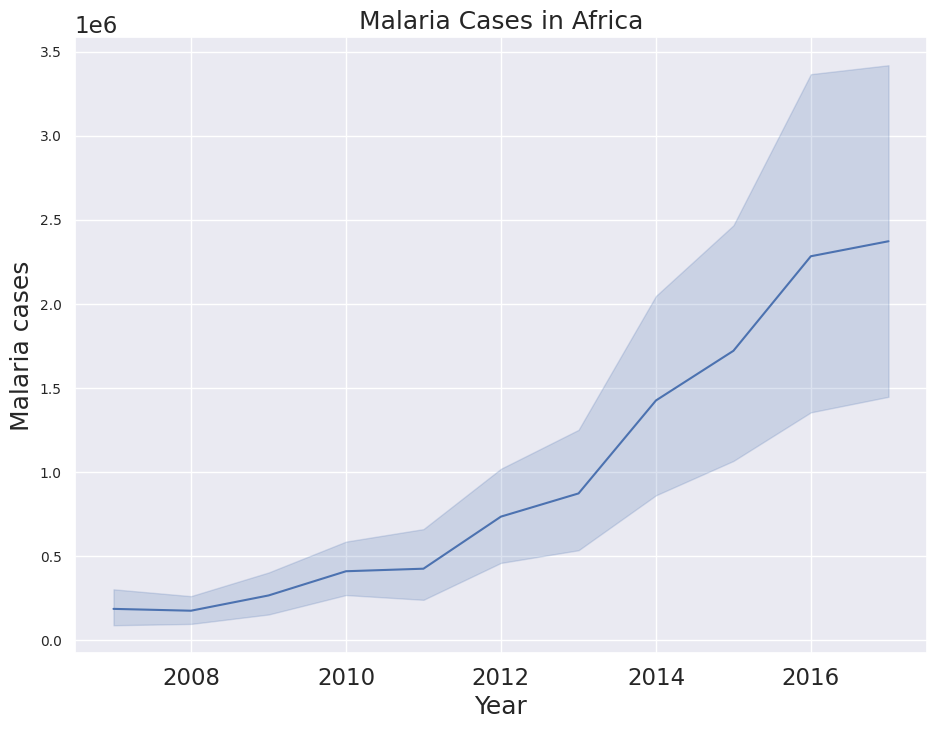

In [45]:
#Trend in cases of Malaria in Africa each year
Malaria = df[['Year','Malaria cases']]
Malaria = Malaria.rename(columns={'Malaria cases':'Malaria_cases_reported'})
Malaria_cases_yearly = Malaria.groupby(Malaria.Year).Malaria_cases_reported.sum()
Malaria_cases_yearly.reset_index()
Malaria_cases_yearly = Malaria_cases_yearly.to_frame()

###plot over the years
#sns.lineplot(data=Malaria_cases_yearly.Malaria_cases_reported)

#plt.title("Malaria cases in Africa per Year")
#plt.xlabel("Year")
#plt.ylabel("Malaria cases")
#plt.show()

###Line Plot - Malaria Cases

sns.set(font_scale = 1.5)
plt.figure(figsize=(11,8))
plt.yticks(fontsize=10)

sns.lineplot(x='Year', y='Malaria cases', data=df).set(title='Malaria Cases in Africa');

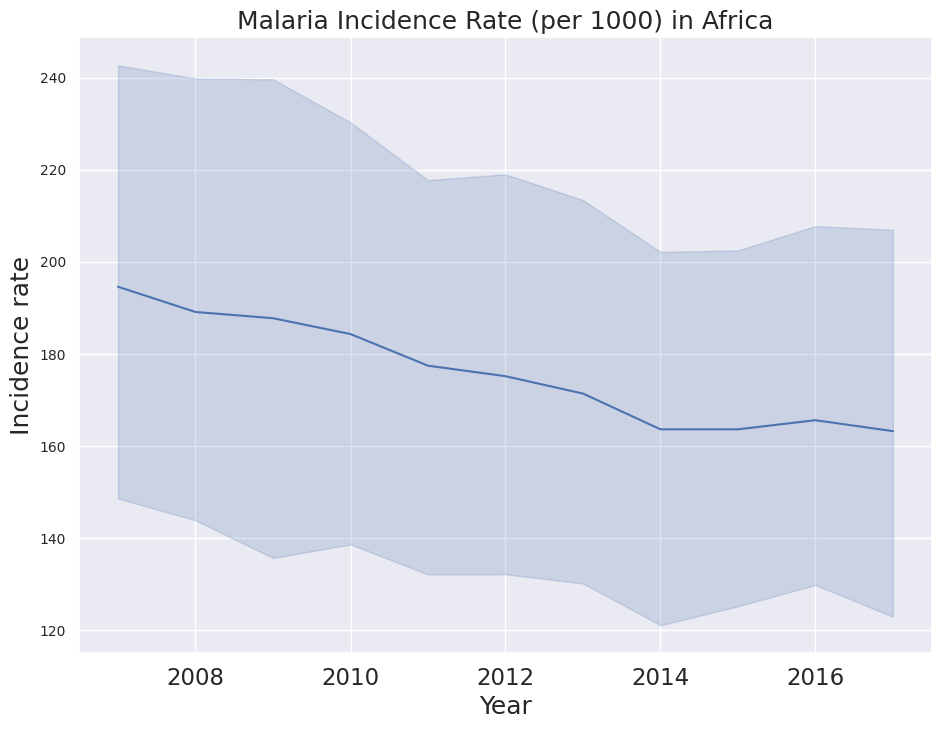

In [46]:
#Line Plot - Incidence rate

sns.set(font_scale = 1.5)
plt.figure(figsize=(11,8))
plt.yticks(fontsize=10)

sns.lineplot(x='Year', y='Incidence rate', data=df).set(title='Malaria Incidence Rate (per 1000) in Africa');

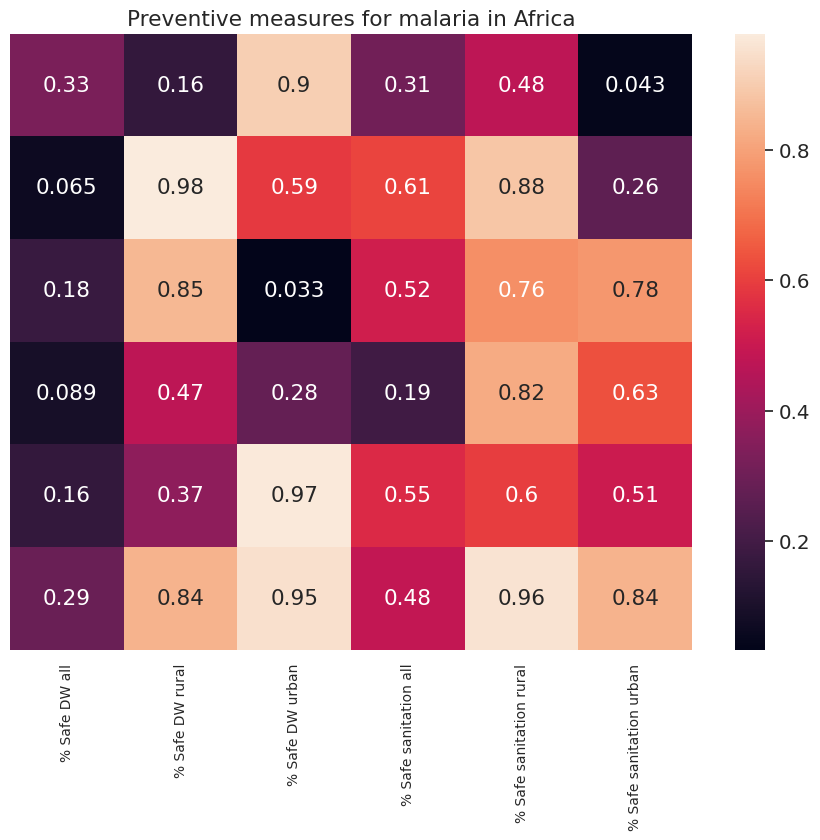

In [50]:
# dataset for preventive measures
preventive_malaria_df = pd.DataFrame(np.random.random((6,6)), columns=["% Safe DW all","% Safe DW rural","% Safe DW urban", "% Safe sanitation all", "% Safe sanitation rural", "% Safe sanitation urban"])

# heatmap for preventive measures
sns.set(font_scale = 1.3)
plt.figure(figsize=(11,8))
plt.xticks(fontsize=10)
sns.heatmap(preventive_malaria_df, annot=True, yticklabels=False).set(title='Preventive measures for malaria in Africa');

**OBSERVATION:**

We can observe that incidence cases reduced from 2007 -2017, although year 2015 - 2016 witnessed a slight increase in incidence cases.

In summary, from the univariate analysis between malaria cases and incidence rates shows that malaria cases increased but the incidence rate decreased which means a negative correlation exist between both features. This can also be attributed to improvement in preventive measures down the years.

GEOGRAPHICAL ANALYSIS

In [48]:
#convert year to string
df.Year = df.Year.astype(str)

In [49]:
#Incidence of Malaria at risk
fig1 = px.choropleth(df,locations=df['Country Code'],
                     color=df['Incidence rate'],
                     color_continuous_scale='Blues',
                     locationmode='ISO-3',scope='africa',
                     animation_frame=df['Year'],title="Incidence of Malaria at risk in Africa",
                     labels={'color':'Incidence of Malaria'})

fig1.show()

In [ ]:
df.columns

Index(['Country Name', 'Year', 'Country Code', 'Incidence rate',
       'Malaria cases', '% Use ITNs', '% Child fever', '% IPT',
       '% Safe DW all', '% Safe DW rural', '% Safe DW urban',
       '% Safe sanitation all', '% Safe sanitation rural',
       '% Safe sanitation urban', '% Rural pop', '% Rural annual growth',
       '% Urban pop', '% Urban annual growth', '% Basic DW all',
       '% Basic DW rural', '% Basic DW urban', '% Basic sanitation all',
       '% Basic sanitation rural', '% Basic sanitation urban', 'latitude',
       'longitude', 'geometry'],
      dtype='object')

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder

#import regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# create a copy of the original dataset
df = dataset.copy()

In [ ]:
# fill missing values with 0
df = df.fillna(0)

In [ ]:
#convert year to string
df.Year = df.Year.astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    object 
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      594 non-null    float64
 4   Malaria cases reported                                                                   594 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

In [ ]:
# find categorical variable and encode
cat_features = df.select_dtypes(include=['object', 'category']).columns
num_features = [col for col in df.columns if col not in cat_features]

# print categorical variable
print("Categorical features: ", cat_features)

# print numerical variable
print("Numerical features: ", num_features)

Categorical features:  Index(['Country Name', 'Year', 'Country Code', 'geometry'], dtype='object')
Numerical features:  ['Incidence of malaria (per 1,000 population at risk)', 'Malaria cases reported', 'Use of insecticide-treated bed nets (% of under-5 population)', 'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)', 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)', 'People using safely managed drinking water services (% of population)', 'People using safely managed drinking water services, rural (% of rural population)', 'People using safely managed drinking water services, urban (% of urban population)', 'People using safely managed sanitation services (% of population)', 'People using safely managed sanitation services, rural (% of rural population)', 'People using safely managed sanitation services, urban  (% of urban population)', 'Rural population (% of total population)', 'Rural population growth (annu

In [ ]:
# label encoding
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [ ]:
cols_to_drop = ['Country Code', 'latitude', 'longitude', 'geometry']

ml_data = df.drop(columns=cols_to_drop)

In [ ]:
ml_data.head()

,Country Name,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",...,Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)"
0,0,0,0.01,26.0,0.0,0.0,0.0,0.0,0.0,0.00,...,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57
1,1,0,286.72,1533485.0,18.0,29.8,1.5,0.0,0.0,0.00,...,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44
2,2,0,480.24,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36
3,3,0,1.03,390.0,0.0,0.0,0.0,0.0,0.0,83.96,...,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30
4,4,0,503.80,44246.0,0.0,0.0,0.0,0.0,0.0,0.00,...,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49


In [ ]:
# standardize data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(ml_data), columns=ml_data.columns)

In [ ]:
# create explanatory variable (X) and response variable (y)
X = scaled_df.drop("Malaria cases reported", axis=1)
y = scaled_df["Malaria cases reported"]

In [ ]:
# split data into train and test sets - 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (415, 22)
y_train shape: (415,)
X_test shape: (179, 22)
y_test shape: (179,)


In [ ]:
#  assert data split to avoid leakage
print(len(X_train) + len(X_test) == len(X))
print(len(y_train) + len(y_test) == len(y))

True
True


In [ ]:
# Build Baseline model
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

# print mean Malaria cases and baseline MAE
print("Mean Malaria cases: ", round(y_train.mean(), 2))
print("Baseline MAE: ", round(mae_baseline.mean(), 2))

Mean Malaria cases:  0.02
Baseline MAE:  0.62


In [ ]:
# Build Linear Regression Model
model = LinearRegression()

# Fit model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluation Metrics
def evaluation_metrics_func(y_true, y_pred):
    
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
# Computing the evaluation metrics
evaluation_metrics_func(y_test, y_pred)

MSE is : 0.655064556606668
MAE is : 0.5282751535053032
RMSE is : 0.8093605850340552
R2 is : 0.28040709971062905



In [ ]:
# obtain feature weights for linear regression
coefficient = model.coef_

# create a dataframe of feature weight
feature_weight = pd.DataFrame(coefficient, X.columns, columns=["Coefficient"]).sort_values(by="Coefficient", ascending=False)
feature_weight

,Coefficient
People using at least basic sanitation services (% of population),0.778641
Year,0.416822
"People using at least basic drinking water services, urban (% of urban population)",0.376813
"Incidence of malaria (per 1,000 population at risk)",0.188970
Urban population growth (annual %),0.188241
"People using safely managed sanitation services, rural (% of rural population)",0.149889
People using safely managed drinking water services (% of population),0.094121
"People using at least basic drinking water services, rural (% of rural population)",0.091239
"People using safely managed sanitation services, urban (% of urban population)",0.088545
Rural population growth (annual %),0.083812


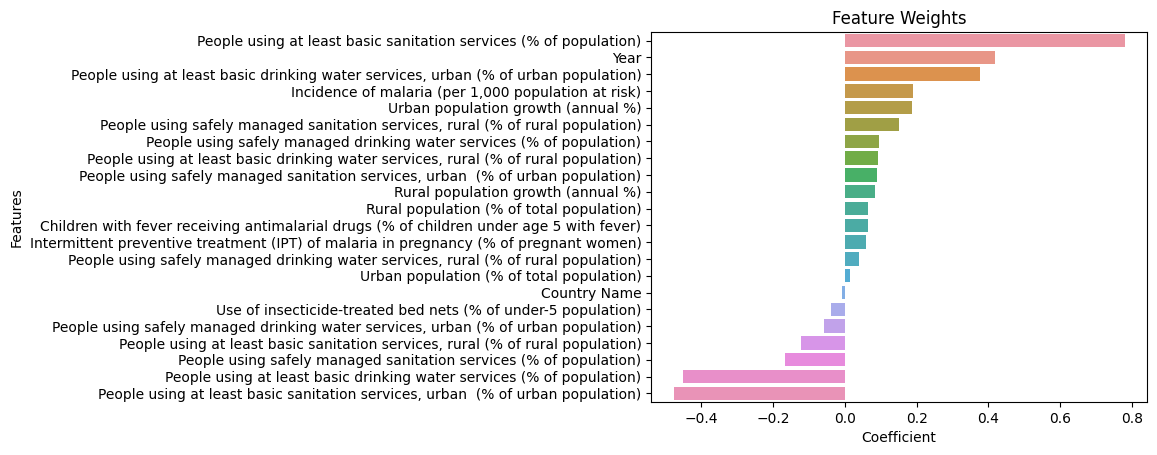

In [ ]:
# plot feature weights using seaborn
sns.barplot(x=feature_weight['Coefficient'], y=feature_weight.index)
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Weights')
plt.show()

In [ ]:
# Build Random Forest Model
model = RandomForestRegressor(n_estimators=10, max_depth=20, min_samples_leaf=5, min_samples_split=5, random_state=42)

# Fit model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Computing the evaluation metrics
evaluation_metrics_func(y_test, y_pred)

MSE is : 0.48649361605252184
MAE is : 0.30503475171451366
RMSE is : 0.6974909433480279
R2 is : 0.4655834320193558

